# Análise Exploratória do Titanic

##### Importando as bibliotecas básicas de análise

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#retira os warnings ao rodar códigos
import warnings
warnings.filterwarnings("ignore")

##### Carregando os datasets

In [175]:
train = pd.read_csv('../titanic/train.csv')
test = pd.read_csv('../titanic/test.csv')

##### Funções que irão ajudar durante as análises

In [3]:
def nulos(data):
    '''
    Verificação dos valores nulos do dataset
    '''
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (round(data.isnull().sum()/data.shape[0]*100,2)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
    return missing_data

def corr(data):
    '''
    Correlação das features do dataset
    '''
    f,ax = plt.subplots(figsize=(20, 8))
    sns.heatmap(data.corr(), annot=True, cmap = "Blues", linewidths=.5, fmt= '.2f',ax = ax)
    plt.show();

##### Começando EDA

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
nulos(train)

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [7]:
nulos(test)

,Total,%
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


###### Vamos tentar aproveitar ao máximo todas as features. Não vou descartar a Cabin
Porém, o que podemos fazer com ela? Vamos olhar...<br>
Talvez criar uma feature nova para separar os com e sem cabines...

In [176]:
train.Cabin.fillna('Sem_Cabine', inplace=True)

In [177]:
test.Cabin.fillna('Sem_Cabine', inplace=True)

In [178]:
train['Have_Cabin'] = train.Cabin.apply(lambda x: 0 if x == 'Sem_Cabine' else 1)

In [179]:
test['Have_Cabin'] = test.Cabin.apply(lambda x: 0 if x == 'Sem_Cabine' else 1)

In [180]:
print('Porcentagem de sobrevivência de quem tinha cabine:',round(train[train.Have_Cabin==1]['Survived'].mean()*100),'%')
print('Porcentagem de sobrevivência de quem *NÃO* tinha cabine:',round(train[train.Have_Cabin==0]['Survived'].mean()*100),'%')

Porcentagem de sobrevivência de quem tinha cabine: 67.0 %
Porcentagem de sobrevivência de quem *NÃO* tinha cabine: 30.0 %


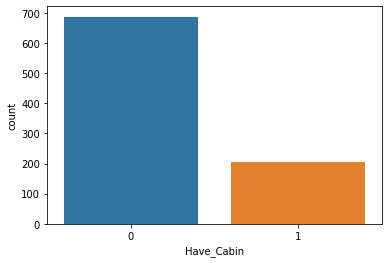

In [13]:
sns.countplot(data=train, x='Have_Cabin')

Não precisamos mais da Feature Cabin, podemos dropar...

In [181]:
train.drop('Cabin', axis=1, inplace=True)

In [182]:
test.drop('Cabin', axis=1, inplace=True)

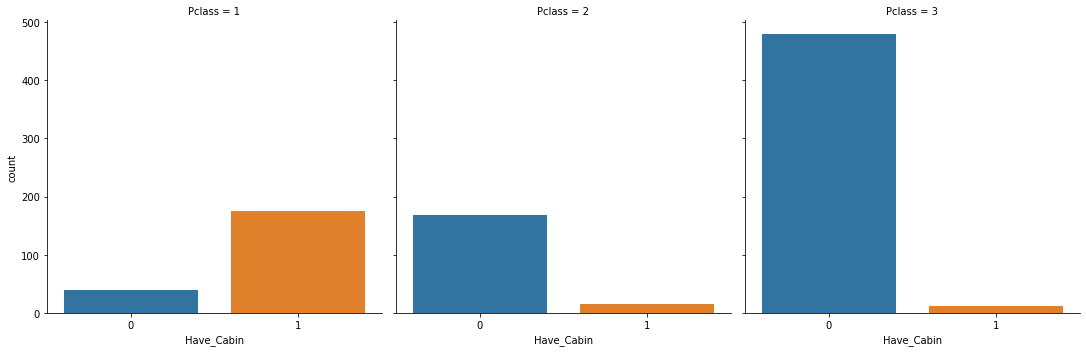

In [16]:
sns.catplot(x='Have_Cabin', col='Pclass', kind='count', data=train)

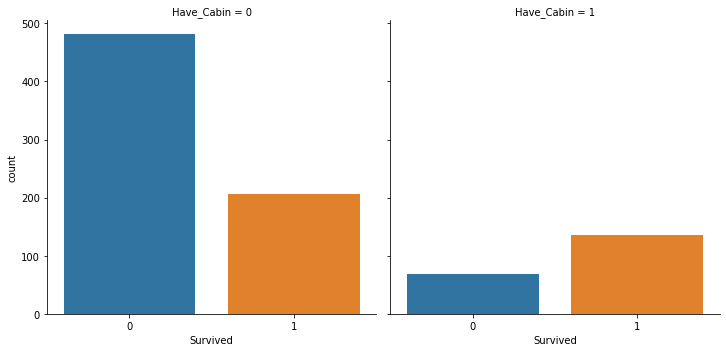

In [17]:
sns.catplot(x='Survived', col='Have_Cabin', kind='count', data=train)

In [183]:
train[['Have_Cabin','Survived']].groupby(['Have_Cabin'], as_index=False).mean()

,Have_Cabin,Survived
0,0,0.299854
1,1,0.666667


##### Como podemos ver, quem tinha cabine teve uma porcentagem de sobrevivência maior  <br>
Parece ser uma boa feature que criamos ;-)

##### Agora vamos ver o que fazer com a idade...

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Have_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


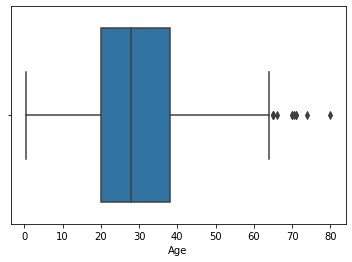

In [20]:
sns.boxplot(train.Age)

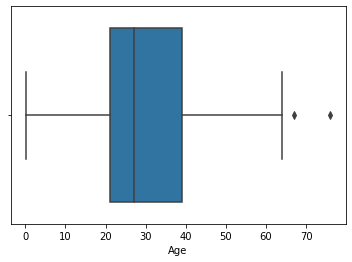

In [21]:
sns.boxplot(test.Age)

Como temos alguns outliers, acho melhor substituir pela mediana do que pela média

In [184]:
train.Age.fillna(train.Age.median(), inplace=True)
test.Age.fillna(test.Age.median(), inplace=True)

<Figure size 1080x576 with 0 Axes>

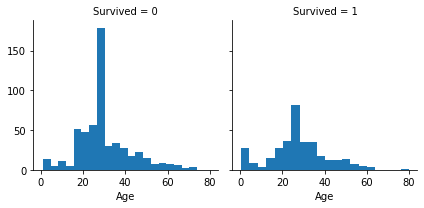

In [94]:
plt.figure(figsize=(15,8))
g = sns.FacetGrid(data=train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<b>Observação importante:</b> Temos um número alto de crianças que sobreviveram<br>
Vale uma feature relacionada a isso...

###### O Embarked como tem somente 2 em branco, vamos substituir pela moda que é mais seguro

In [27]:
test.Embarked.isna().sum()

0

In [28]:
train.Embarked.mode()[0]

'S'

In [185]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)

In [186]:
nulos(train)

,Total,%
Have_Cabin,0,0.0
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [97]:
nulos(test)

,Total,%
Fare,1,0.24
Have_Cabin,0,0.00
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Age,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [98]:
test[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Have_Cabin
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


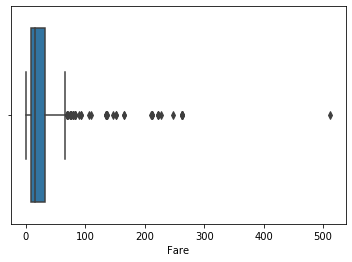

In [33]:
sns.boxplot(test.Fare)

Como temos vários outliers, vamos substituir o Fare pela mediana da 3 classe (que é a classe do valor nulo).

In [187]:
test.Fare.fillna(test[test.Pclass==3]['Fare'].median(), inplace=True)

##### Vamos criar o título das pessoas - Altas patentes serão salvas primeiro?

In [188]:
train.Name.str.extract(r'([A-Za-z]+)\.')[:5]

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [189]:
train['Titulo'] = train.Name.str.extract(r'([A-Za-z]+)\.')

In [190]:
test['Titulo'] = test.Name.str.extract(r'([A-Za-z]+)\.')

In [191]:
test.Titulo.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Titulo, dtype: int64

In [192]:
test.Titulo.replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                    ['Miss','Mrs','Miss','Rare','Rare','Rare','Rare','Rare','Rare','Rare','Rare','Rare','Mr','Mrs'],inplace=True)

In [193]:
test.Titulo.value_counts()

Mr        240
Miss       79
Mrs        73
Master     21
Rare        5
Name: Titulo, dtype: int64

In [194]:
train['Titulo'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Sir           1
Capt          1
Mme           1
Lady          1
Jonkheer      1
Countess      1
Don           1
Name: Titulo, dtype: int64

In [195]:
train.Titulo.replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                    ['Miss','Mrs','Miss','Rare','Rare','Rare','Rare','Rare','Rare','Rare','Rare','Rare','Mr','Mrs'],inplace=True)

In [196]:
train.Titulo.value_counts()

Mr        518
Miss      185
Mrs       126
Master     40
Rare       22
Name: Titulo, dtype: int64

Changes de sobrevivência maiores nos homens ou mulheres? E em quais títulos?

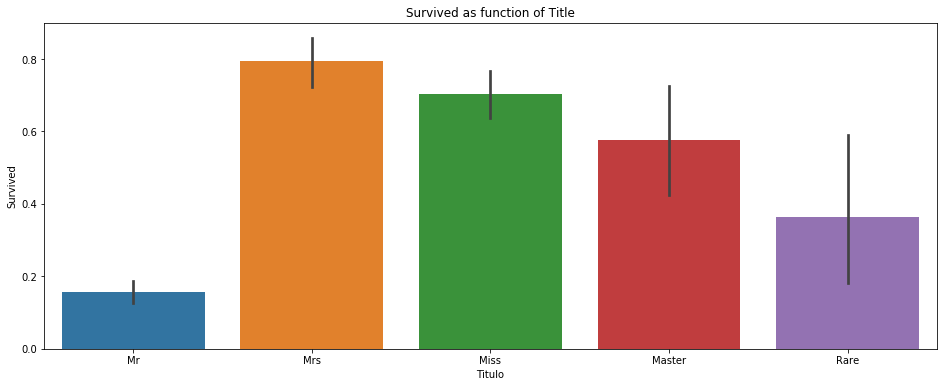

In [197]:
plt.subplots(figsize=(16,6))
sns.barplot(x='Titulo' , y='Survived' , data = train)
plt.ylabel("Survived")
plt.title("Survived as function of Title")
plt.show()

Podemos ver que mulheres tem mais change do que homens.
<br>
E que Master, nobres também tem mais chances de sobreviver

In [198]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Have_Cabin,Titulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Mr


Dropando algumas colunas que não são importantes para as previsões

In [199]:
new_train = train.drop(['PassengerId','Name','Ticket'], axis=1)

In [200]:
new_test = test.drop(['Name','Ticket'], axis=1)

###### Será que a chance de sobreviver está ligada a quantidade de membros da família que estavam viajando?

In [201]:
new_train['Qty_Family'] = new_train['SibSp'] + new_train['Parch'] + 1

In [202]:
new_test['Qty_Family'] = new_test['SibSp'] + new_test['Parch'] + 1

In [203]:
new_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Have_Cabin,Titulo,Qty_Family
0,0,3,male,22.0,1,0,7.2500,S,0,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,2
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,0,Mr,1


In [204]:
new_train[['Qty_Family', 'Survived']].groupby(['Qty_Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Qty_Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [205]:
new_train['Sozinho'] = new_train['Qty_Family'].apply(lambda x: 1 if x == 1 else 0)

In [206]:
new_test['Sozinho'] = new_test['Qty_Family'].apply(lambda x: 1 if x == 1 else 0)

In [207]:
new_train[['Sozinho', 'Survived']].groupby(['Sozinho'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sozinho,Survived
0,0,0.505650
1,1,0.303538


Plotando a correlação das features que temos até agora...

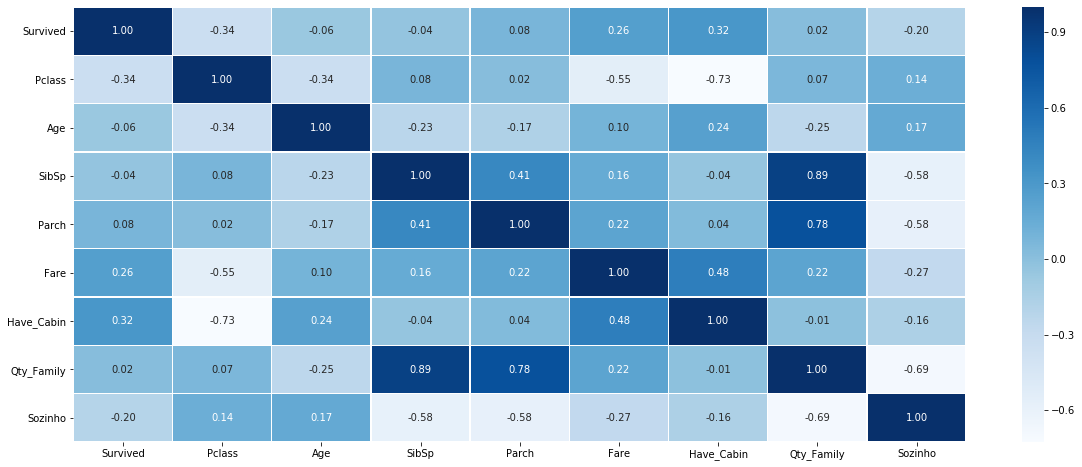

In [159]:
corr(new_train)

<li> SibSp, Parch e Qty_Family não se mostraram muito correlacionadas com Survived </li>
<li> Acredito que podemos criar uma feature relacionada a Age para melhorar a correlação </li>

In [208]:
new_train = new_train.drop(['Parch','SibSp','Qty_Family'], axis=1)
new_test = new_test.drop(['Parch','SibSp','Qty_Family'], axis=1)

Vamos melhorar a correlação das idades

In [209]:
new_train['Crianca'] = new_train.Age.apply(lambda x: 1 if x < 16 else 0)
new_test['Crianca'] = new_test.Age.apply(lambda x: 1 if x < 16 else 0)

In [210]:
new_train['Meia_Idade'] = new_train.Age.apply(lambda x: 1 if (x > 16) & (x < 40) else 0)
new_test['Meia_Idade'] = new_test.Age.apply(lambda x: 1 if (x > 16) & (x < 40) else 0)

In [211]:
new_train.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Have_Cabin,Titulo,Sozinho,Crianca,Meia_Idade
352,0,3,male,15.0,7.2292,C,0,Mr,0,1,0
506,1,2,female,33.0,26.0000,S,0,Mrs,0,0,1
691,1,3,female,4.0,13.4167,C,0,Miss,0,1,0
148,0,2,male,36.5,26.0000,S,1,Mr,0,0,1
678,0,3,female,43.0,46.9000,S,0,Mrs,0,0,0
320,0,3,male,22.0,7.2500,S,0,Mr,1,0,1
128,1,3,female,28.0,22.3583,C,1,Miss,0,0,1
460,1,1,male,48.0,26.5500,S,1,Mr,1,0,0
151,1,1,female,22.0,66.6000,S,1,Mrs,0,0,1
611,0,3,male,28.0,7.0500,S,0,Mr,1,0,1


In [212]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null object
Age           891 non-null float64
Fare          891 non-null float64
Embarked      891 non-null object
Have_Cabin    891 non-null int64
Titulo        891 non-null object
Sozinho       891 non-null int64
Crianca       891 non-null int64
Meia_Idade    891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.6+ KB


In [213]:
train_dummies = pd.get_dummies(new_train)

In [214]:
test_dummies = pd.get_dummies(new_test)

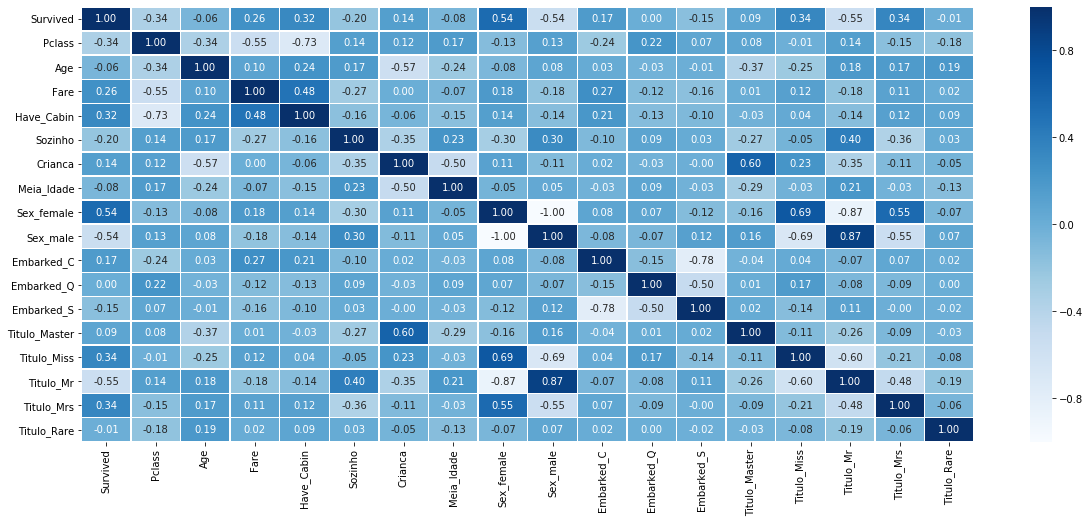

In [215]:
corr(train_dummies)

In [216]:
train_dummies.head()

,Survived,Pclass,Age,Fare,Have_Cabin,Sozinho,Crianca,Meia_Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare
0,0,3,22.0,7.2500,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,1,38.0,71.2833,1,0,0,1,1,0,1,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,0,1,0,1,1,0,0,0,1,0,1,0,0,0
3,1,1,35.0,53.1000,1,0,0,1,1,0,0,0,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,1,0,1,0,1,0,0,1,0,0,1,0,0


In [217]:
test_dummies.head()

,PassengerId,Pclass,Age,Fare,Have_Cabin,Sozinho,Crianca,Meia_Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare
0,892,3,34.5,7.8292,0,1,0,1,0,1,0,1,0,0,0,1,0,0
1,893,3,47.0,7.0000,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,894,2,62.0,9.6875,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,895,3,27.0,8.6625,0,1,0,1,0,1,0,0,1,0,0,1,0,0
4,896,3,22.0,12.2875,0,0,0,1,1,0,0,0,1,0,0,0,1,0


In [128]:
'''
train_dummies.drop('Age',axis=1,inplace=True)
test_dummies.drop('Age',axis=1,inplace=True)
'''

"\ntrain_dummies.drop('Age',axis=1,inplace=True)\ntest_dummies.drop('Age',axis=1,inplace=True)\n"

In [218]:
train_dummies.to_csv('../titanic/train_eda.csv', index=False)
test_dummies.to_csv('../titanic/test_eda.csv', index=False)

### Agora iremos ao Machine Learning